## 실습1.간단한 Hellow World 프로그램

### 1.Dockerfile 작성과 app.js 파일 준비

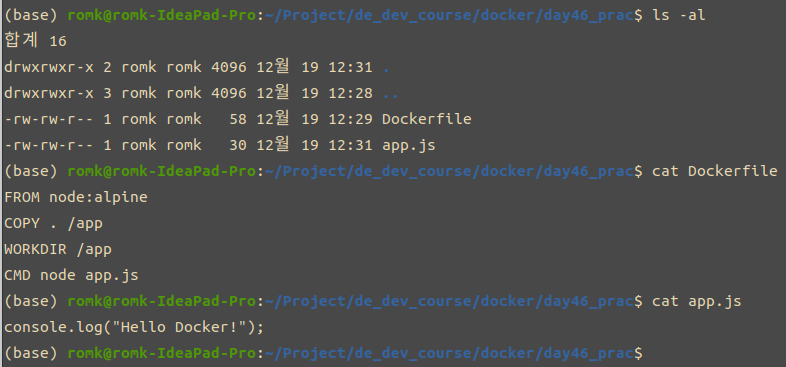

### 2.docker image 빌드

In [ ]:
# docker image 빌드
!docker build --platform linux/amd64 -t hello-world-docker .

# 빌드한 docker image 확인
!docker image ls

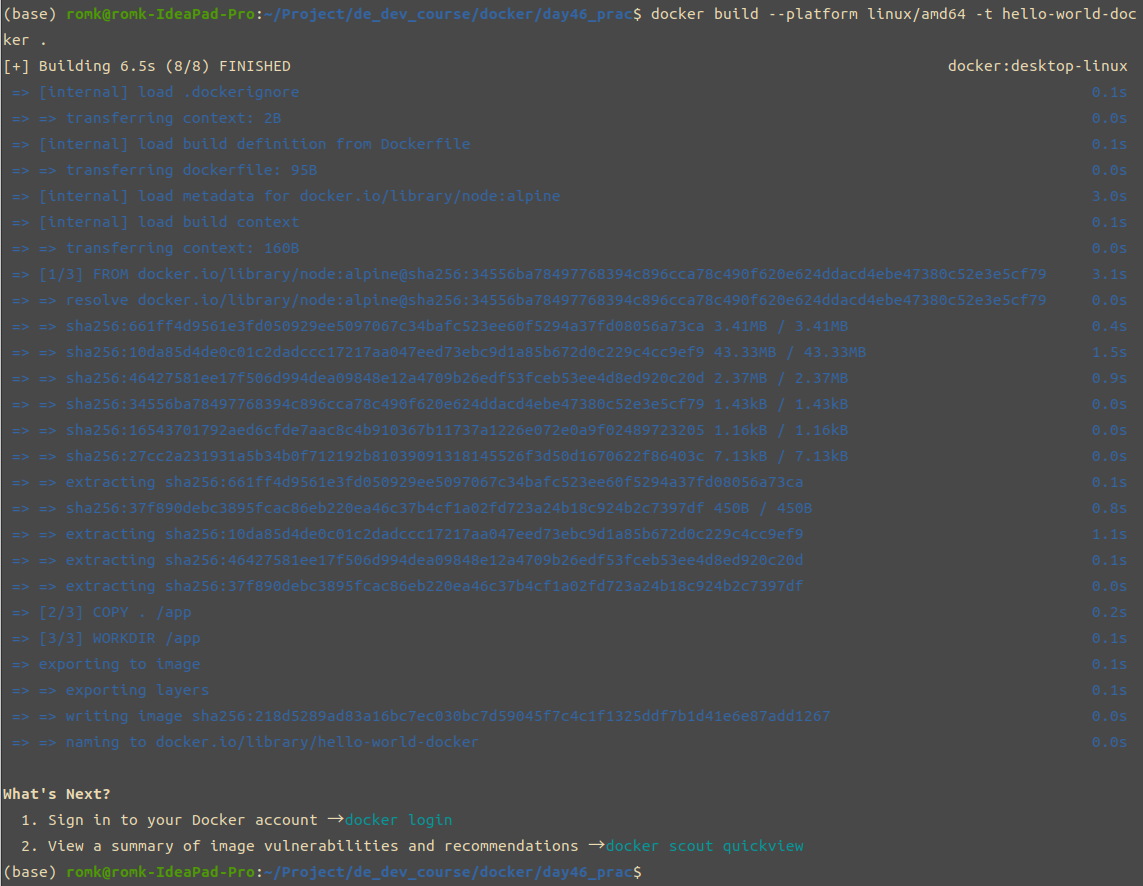
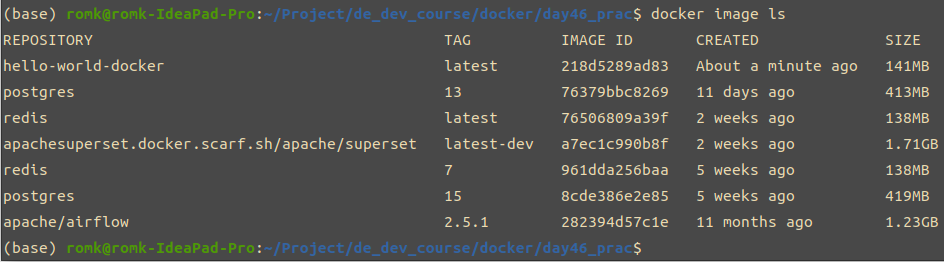

### 3.docker hub에서 레포지토리 생성

- Docker hub 공홈 : https://hub.docker.com/
- 3-1. Repositories 메뉴 → Create repository 버튼 클릭
- 3-2.레포지토리 생성 옵션
- 3-3.레포지토리 생성 완료

### 4.docker image 별칭 설정

In [ ]:
!docker tag hello-world-docker {namespace}/hello-world-docker

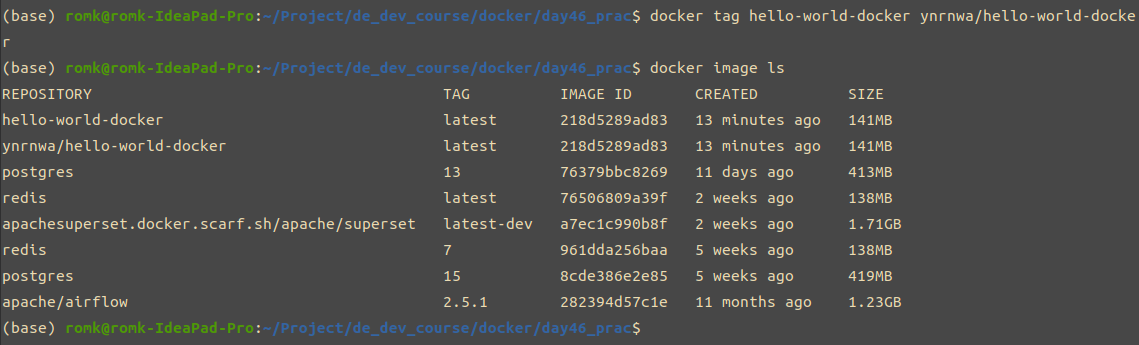

### 5.docker hub에 로그인

In [ ]:
!docker login --username={아이디}
# 비밀번호까지 입력

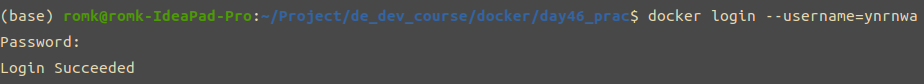

### 6.docker hub에 docker image push

- push 명령 실행 후 비밀번호를 물어보는 팝업창이 뜨는데 정상적으로 비밀번호를 입력했는데 실패했고 이유는 Docker Desktop이 실행되지 않아서 실패한 것이고, Docker Desktop 실행 상태에서 명령을 실행하면 성공함

In [ ]:
!docker push {namespace}/hello-world-docker

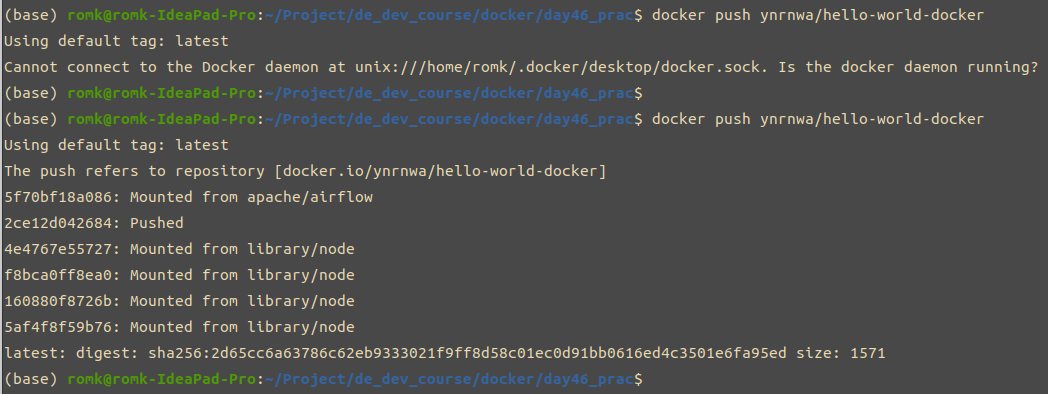

### 7.docker hub에서 확인

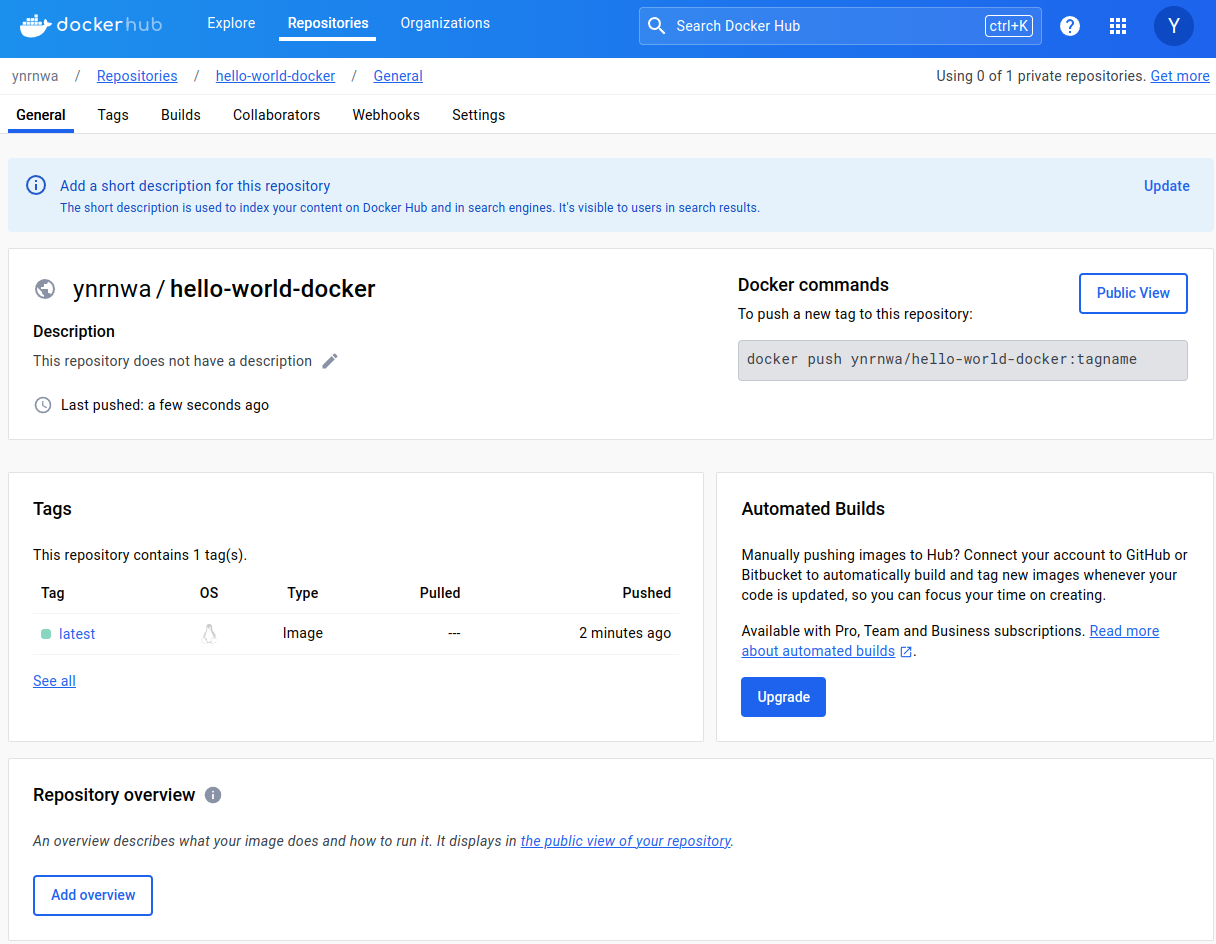

### 8.다른 서버에서 docker hub에 업로드된 이미지 Run

- https://labs.play-with-docker.com/ 사용

In [ ]:
!docker pull {namespace}/hello-world-docker

!docker run {namespace}/hello-world-docker

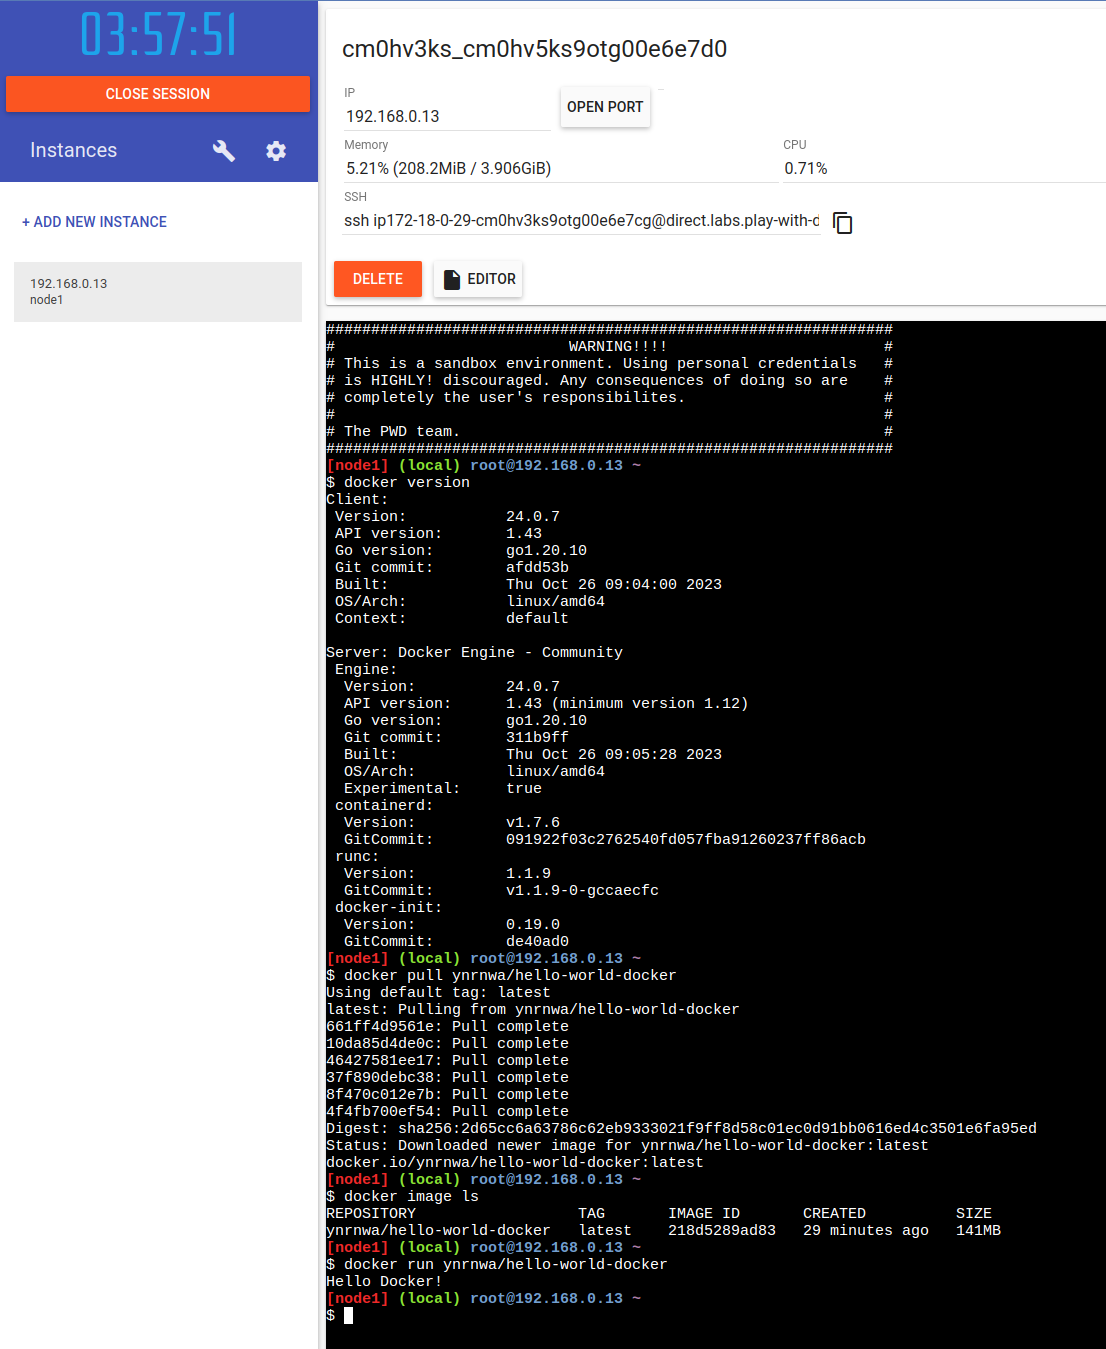

### Problem(docker desktop 로그인 문제)

- docker 공식 docs의 해당 문제 해결 방법 참조
- https://docs.docker.com/desktop/get-started/#credentials-management-for-linux-users

#### 1. gpg key 생성

In [ ]:
!gpg --generate-key

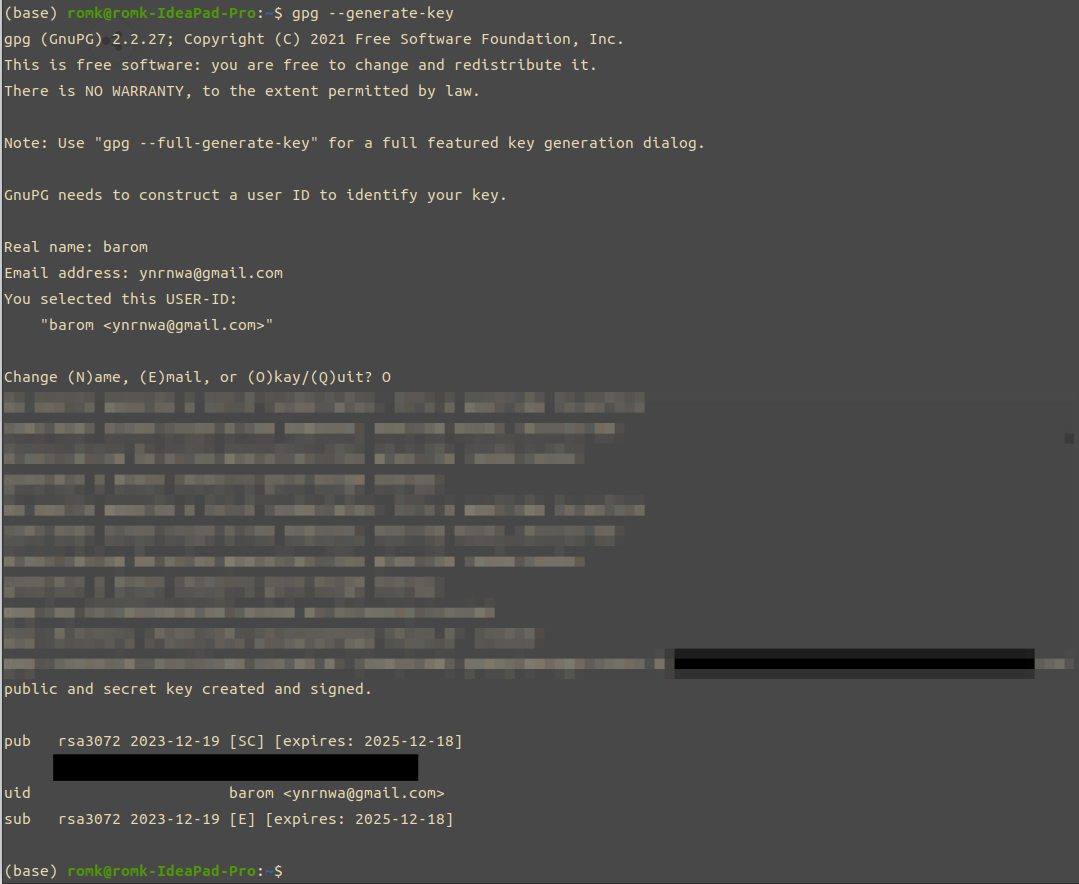

#### 2.pass 명령으로 초기화

In [ ]:
!pass init <generated gpg-id public key>

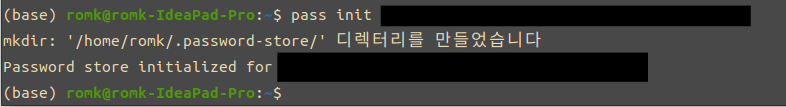

## 실습2.Ubuntu 실행

### 1.ubuntu docker image 실행

In [ ]:
!docker run ubuntu
# ubuntu라는 docker image가 없어서
# 공식이미지의 ubuntu를 다운로드 받고
# 태그도 지정하지 않았기 때문에 최신(latest)버전이 설치됨

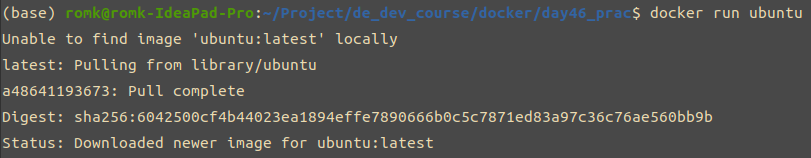

### 2.ubuntu 컨테이너 확인

In [ ]:
!docker ps -a
# 실행했었던(정지된 컨테이너까지 모두) 컨테이너들 목록보기

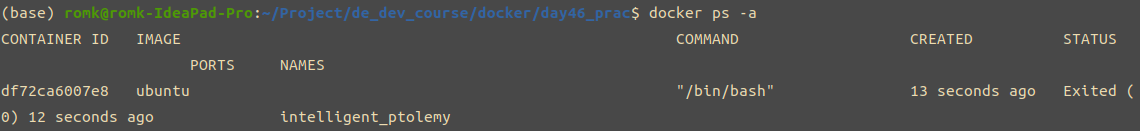

### 3.it 옵션으로 실행

In [ ]:
!docker run -it ubuntu
# run 옵션
# -i, -interactive : 컨테이너의 표준 입력(stdin)을 활성화
# -t, -tty : 가상터미널(tty)을 할당
# 주로 -i와 -t 옵션은 함께 사용됨

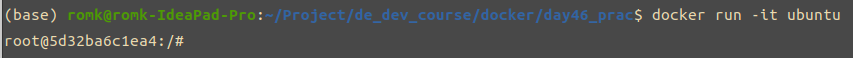

### 4.컨테이너 종료

- Ctrl + D, exit : 컨테이너를 종료하고 나가기
- Ctrl + P + Q : 컨테이너를 종료하지 않고 나가기

## 실습3.MySQL 8.0 서버 실행

### 1.MySQL 8.0 버전 이미지 다운로드

In [ ]:
!docker pull mysql/mysql-server:8.0

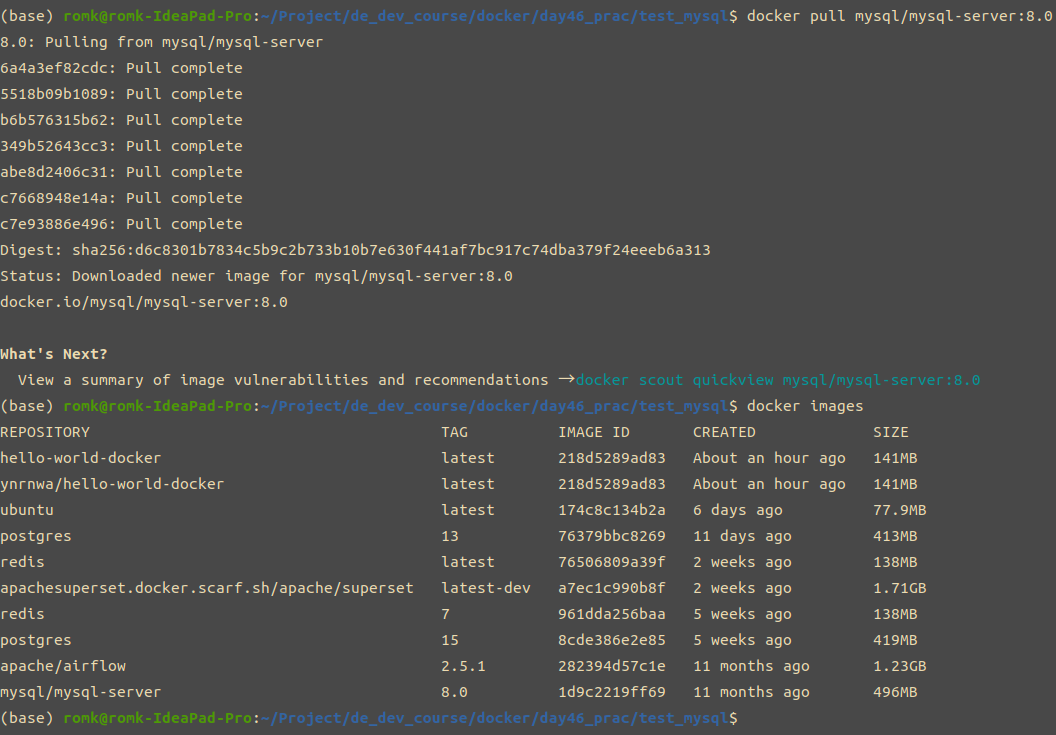

### 2.MySQL docker image 실행

In [ ]:
!docker run --name=mysql_container mysql/mysql-server:8.0
# --name 옵션 사용

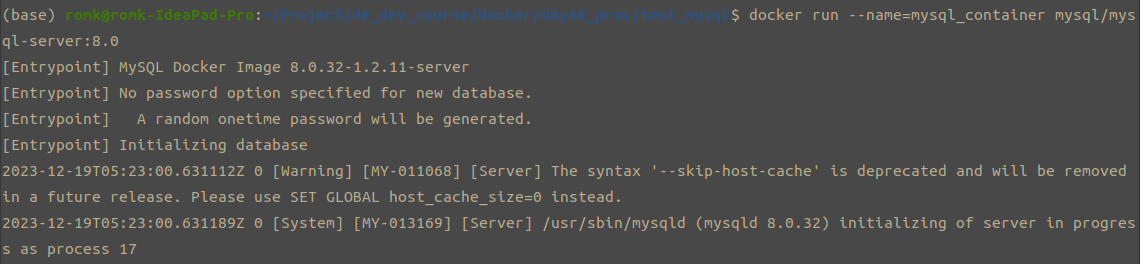

### 3.새 터미널창을 열고 로그에서 초기비밀번호 확인 후 실행

In [ ]:
!docker logs mysql_container 2>&1 | grep GENERATED
# 도커 이미지를 run하면서 생성된 log파일에서 초기비밀번호 찾기

In [ ]:
!docker exec -it mysql_container mysql -uroot -p
# 위에서 찾은 비밀번호 입력

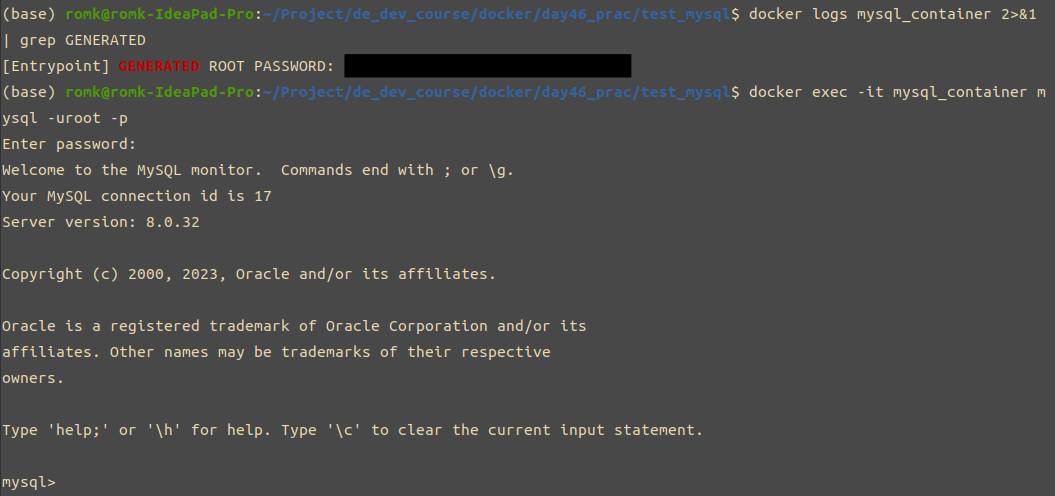

### 4.초기비밀번호로 로그인을 하는 경우 에러 발생 → ALTER 명령으로 비밀번호 변경필요

In [ ]:
mysql> ALTER USER root@localhost IDENTIFIED BY '{변경할 비밀번호}';

In [ ]:
mysql> show databases;

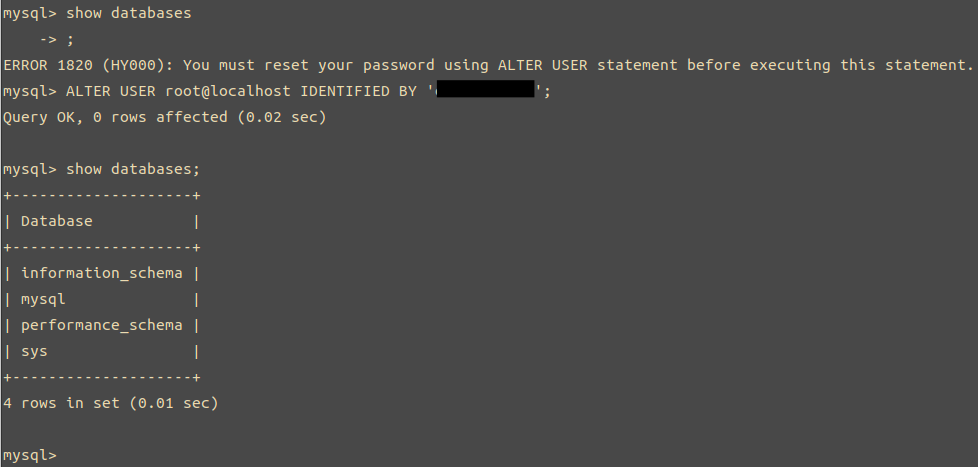